# Machine Learning: Support Vector Machines

STUDI KASUS

Kali ini kita kembali membahas tentang permasalahan seorang pemilik showroom mobil. Ia bingung di mana ia harus mengiklankan produknya. Ia ingin agar iklannya sesuai target, sehingga mereka yang melihat iklannya memiliki kemungkinan (probability) yang tinggi untuk membeli mobil SUVnya.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


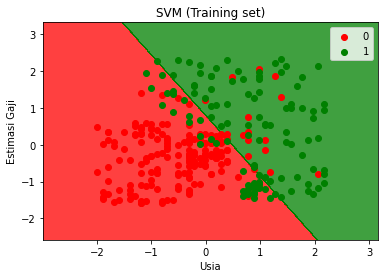

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


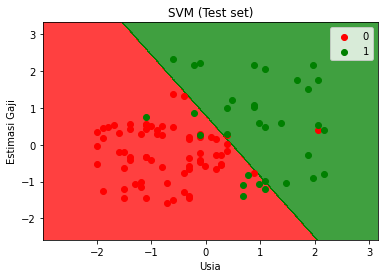

In [7]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
dataset = pd.read_csv('Iklan_sosmed.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
 
# Menjadi dataset ke dalam Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
# Membuat model SVM terhadap Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
 
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)
 
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
# Visualisasi hasil model SVM dari Training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()
 
# Visualisasi model SVM terhadap Test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

Pada gambar di atas, bisa dilihat bahwa ada 10 dari 100 titik yang salah dideteksi oleh SVM (akurasi 90%). Artinya bahwa model SVM yang menggunakan kernel linear sudah cukup baik untuk membantu pemilik showroom mobil menentukan wilayah yang tepat untuk iklan mobil SUV nya di internet.

- Line 22 mengimpor SVM dari sklearn.
- Line 23 mendefinisikan objek classifier sebagai model SVM dengan parameter kernel=linear dan random number generator = 0. Penentuan random number generator ini bebas ya. Tips: Arahkan kursor pada SVC kemudian ketik di keyboard CTRL+i untuk bisa melihat parameter apa saja yang diperlukan untuk membuat model SVM. Perhatikan bahwa kernel yang kita pilih adalah linear, artinya SVM akan membuat hyperplane yang bersifat linear untuk 2 dimensi. Kernel=linear bisa juga diartikan tanpa kernel, karena itu adalah algoritma SVM biasa, tanpa penambahan kernel. Di halaman selanjutnya kita akan menggunakan kernel yang berbeda.

- Tampilannya parameternya adalah sebagai berikut :

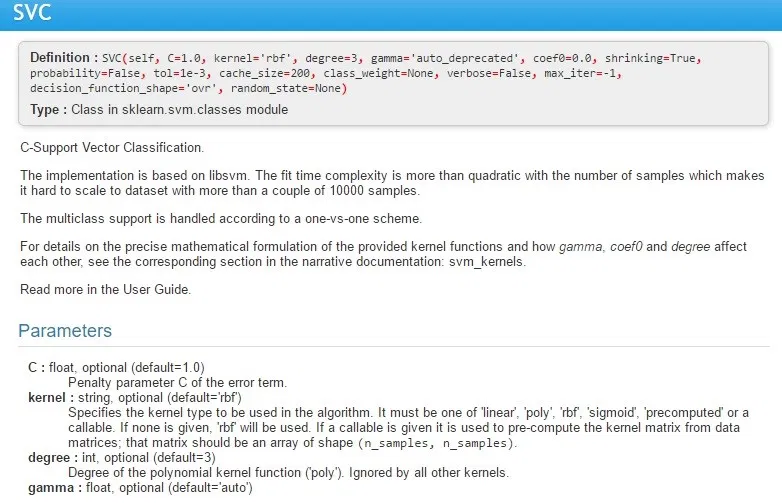

- Line 24 membuat model SVM nya terhadap Training set.
- Line 27 mendefinisikan objek y_pred sebagai hasil prediksi dari model yang dibuat di line 24 ke Test set.
- Line 30-31 membuat Confusion matrix (untuk bisa menilai akurasi modelnya nanti).
- Line 34-49 adalah perintah untuk memvisualisasikan hasil model SVM terhadap Training set. 
- Line 52-67 adalah visualisasi model SVM kita terhadap Test set.

https://www.megabagus.id/machine-learning-support-vector-machines/3/